In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_regression #data set aléatoire 

ModuleNotFoundError: No module named 'sklearn'

In [7]:
import matplotlib.pyplot as plt #bibliotheque pour visualisé nos données 

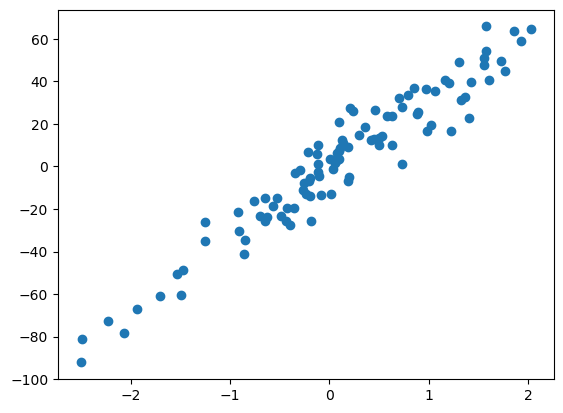

In [66]:
#1/Dataset 
x,y =make_regression(n_samples =100 ,n_features=1 ,noise=10 )#nbvdonnées et nb variable et le bruit
plt.scatter(x,y) # x en abssice et y en ordonné 

In [210]:
print(x.shape)
print(y.shape)
#important de verifier les dimensions des matrices car sinon
#ça va faire du n'importe quoi elle va afficher à la fin des traits partout et pour chaque valeur

(100, 1)
(100, 1)


In [212]:
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [214]:
#matrice 
X=np.hstack((x, np.ones(x.shape)))
X

array([[-0.12619613,  1.        ],
       [ 0.50366749,  1.        ],
       [-0.48765367,  1.        ],
       [ 1.20247126,  1.        ],
       [ 0.05254562,  1.        ],
       [ 0.18663415,  1.        ],
       [-0.90803771,  1.        ],
       [ 0.58199283,  1.        ],
       [-0.21264169,  1.        ],
       [ 0.0046634 ,  1.        ],
       [ 1.42470988,  1.        ],
       [-0.43916515,  1.        ],
       [-0.40141298,  1.        ],
       [-0.25275544,  1.        ],
       [ 1.36802693,  1.        ],
       [ 0.03320067,  1.        ],
       [ 1.57247817,  1.        ],
       [-0.19483867,  1.        ],
       [-0.11016353,  1.        ],
       [ 0.07923229,  1.        ],
       [-0.29935857,  1.        ],
       [ 1.57673515,  1.        ],
       [-1.93789636,  1.        ],
       [ 0.09422043,  1.        ],
       [ 0.02044889,  1.        ],
       [ 0.09425169,  1.        ],
       [ 0.98679633,  1.        ],
       [ 1.32163497,  1.        ],
       [ 0.5017308 ,

In [184]:
theta =np.random.randn(2,1)
theta

array([[1.23501266],
       [0.66703089]])

In [74]:
#modele

In [186]:
def modele(X,theta):
    return X.dot(theta)

In [188]:
modele(X,theta)

array([[ 0.51117708],
       [ 1.28906662],
       [ 0.06477244],
       [ 2.15209812],
       [ 0.73192539],
       [ 0.89752644],
       [-0.45440717],
       [ 1.38579941],
       [ 0.40441571],
       [ 0.67279025],
       [ 2.42656564],
       [ 0.12465637],
       [ 0.17128078],
       [ 0.35487473],
       [ 2.35656147],
       [ 0.70803413],
       [ 2.60906134],
       [ 0.42640266],
       [ 0.53097754],
       [ 0.76488377],
       [ 0.29731926],
       [ 2.61431877],
       [-1.72629564],
       [ 0.78339431],
       [ 0.69228553],
       [ 0.78343293],
       [ 1.88573685],
       [ 2.29926681],
       [ 1.28667478],
       [ 0.76528308],
       [ 0.56372181],
       [ 0.42355845],
       [ 2.85756897],
       [ 0.37839169],
       [ 1.44188374],
       [ 1.04077443],
       [ 1.86849327],
       [ 0.01112098],
       [-0.1346198 ],
       [ 0.96265687],
       [-0.38534595],
       [-1.1780906 ],
       [-0.03035009],
       [ 1.22500092],
       [-0.47328883],
       [ 1

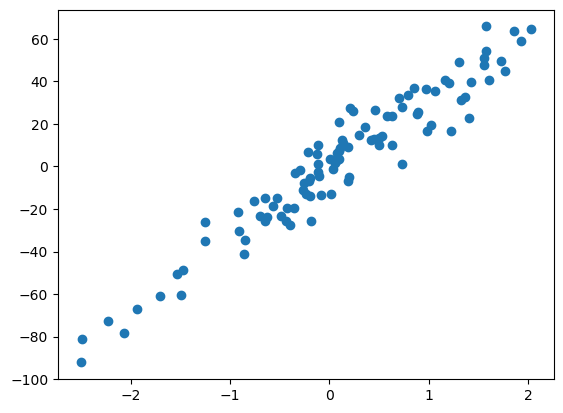

In [190]:
plt.scatter(x,y)

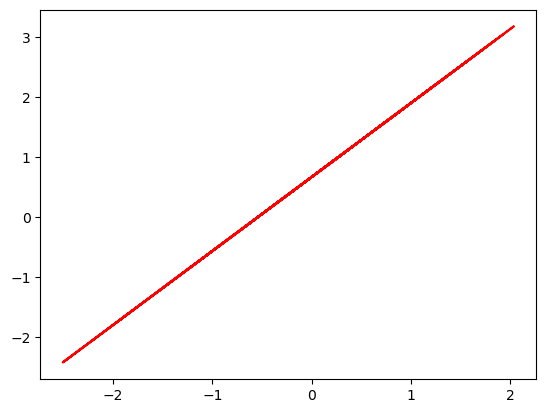

In [192]:
plt.plot(x,modele(X,theta),c='r')

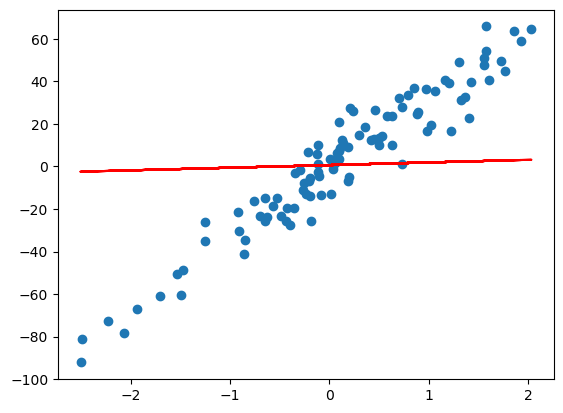

In [194]:
#on regroupe les deux ça donne 
plt.scatter(x,y)
plt.plot(x,modele(X,theta),c='r')

In [90]:
#fontion cout

In [196]:
def cost_func (X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((modele(X,theta)-y)**2)

In [198]:
cost_func(X,y,theta)

517.28666670606

In [102]:
#calcule du graditent algo minimisation 

In [200]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(modele(X,theta)-y)
    

In [240]:
def grad_decent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - learning_rate * grad(X,y,theta)
        cost_history[i]=cost_func(X,y,theta)
    return theta , cost_history


In [242]:
#Entrainement du modèle "MACHINE LEARNING"
theta_final, cost_history =grad_decent(X,y,theta,learning_rate=0.1,n_iterations=1000)
#learning rate peut donner un résultats de plus en plus prècis 

In [228]:
theta_final

array([[32.09087187],
       [-1.02487352]])

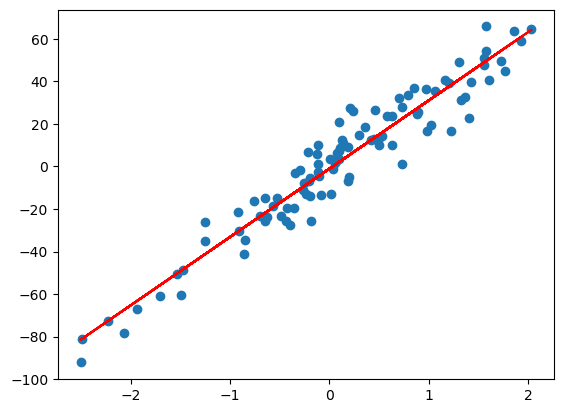

In [230]:
prediction=modele(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

In [246]:
#courbe d'apprentissage en fonction des iterations en abssice

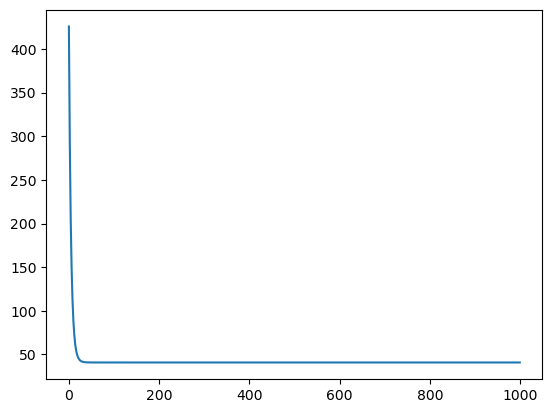

In [244]:
plt.plot(range(1000),cost_history)

In [248]:
#Coefficient de détermination 

In [250]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [254]:
coef_determination(y,prediction)
#plus proche de 1 plus performant 

0.9265036359484273